In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fnd=pd.read_csv('fandango_scrape.csv')
fnd.head(10)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055




fandango_scrape.csv contains every film 510 pulled from Fandango.


|Column	| Definiton|
|:--------:|:--------:|
|FILM	|The movie |
|STARS	|Number of stars presented on Fandango.com |
|RATING	|The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.|
|VOTES	|number of people who had reviewed the film at the time we pulled it. |

In [3]:
fnd.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


In [4]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


<Axes: title={'center': 'FANDANGO VOTES VS RATING DISTRBN'}, xlabel='RATING', ylabel='VOTES'>

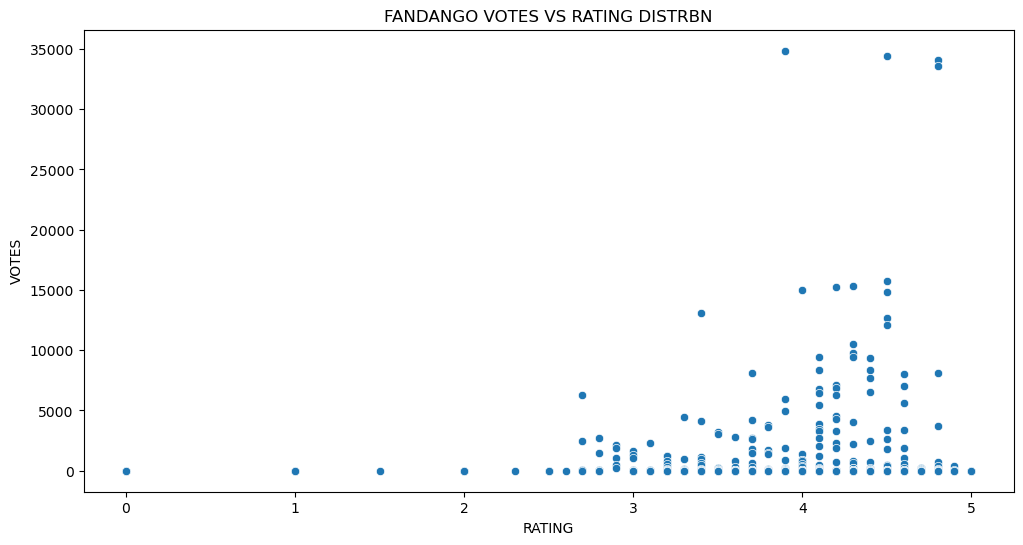

In [5]:
plt.figure(figsize=(12,6))
plt.title('FANDANGO VOTES VS RATING DISTRBN')
sns.scatterplot(data=fnd,y='VOTES',x='RATING')

In [6]:
fnd.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


Create a new column that is able to strip the year from the title strings and set this new column as YEAR

In [7]:
fnd.head(1)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846


In [8]:
fnd['YEAR']=fnd['FILM'].apply(lambda name: name[-5:-1])
fnd.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [9]:
fnd['YEAR'].value_counts()

YEAR
2015    478
2014     23
e (1      2
2016      1
s (1      1
d (1      1
r (1      1
1 (1      1
1964      1
a (1      1
Name: count, dtype: int64

In [10]:
fnd[fnd['YEAR']=='s (1']

,FILM,STARS,RATING,VOTES,YEAR
393,We Come as Friends (1),4.0,4.0,2,s (1


In [11]:
fnd[fnd['YEAR']=='r (1']

,FILM,STARS,RATING,VOTES,YEAR
464,La dame en or (1),0.0,0.0,0,r (1


In [12]:
fnd[fnd['YEAR']=='e (1']

,FILM,STARS,RATING,VOTES,YEAR
479,New Movie (1),0.0,0.0,0,e (1
503,Traque (1),0.0,0.0,0,e (1


**These movies are kind of outliers with no necessary information. It won't be harmful if we drop them.**

In [13]:
# List of unwanted values in the 'YEAR' column
unwanted_values = ['e (1', 'a (1', 'r (1', '1 (1', 's (1', 'd (1']

# Drop rows where 'YEAR' column has any of the unwanted values
fnd = fnd[~fnd['YEAR'].isin(unwanted_values)]


In [14]:
fnd['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
Name: count, dtype: int64

In [15]:
fnd.sort_values(by='VOTES',ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [16]:
len(fnd[fnd['VOTES']==0])

68

## 68 movies still have zero votes

In [17]:
fnd_voted=fnd[fnd['VOTES']>0]
fnd_voted.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**fnd_voted has movies with votes with votes greater than zero**

 Creating a KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Cliping the KDEs to 0-5

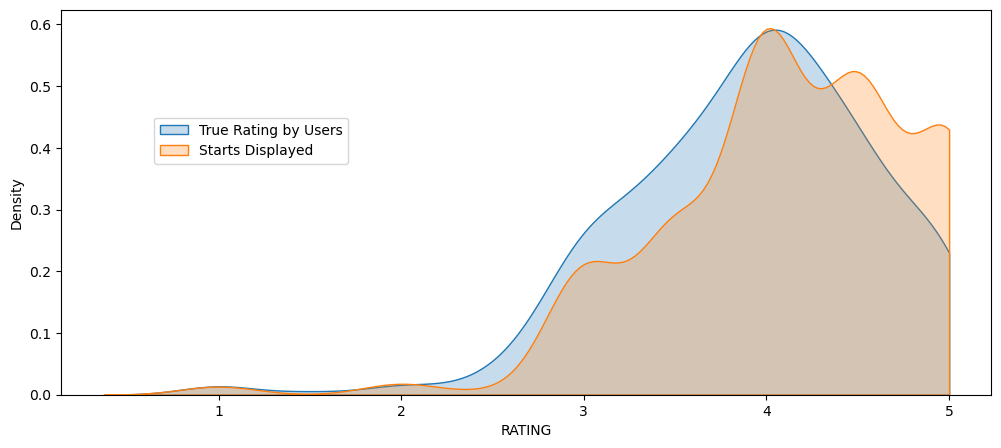

In [18]:
plt.figure(figsize=(12,5))

sns.kdeplot(data=fnd_voted, x='RATING', clip=[0, 5], fill=True, label='True Rating by Users')
sns.kdeplot(data=fnd_voted, x='STARS',  clip=[0, 5], fill=True, label='Starts Displayed');

plt.legend(loc=(0.1,0.6));

## For movies that have received Rating greater than 4 we notice a trend where they are rounded off to the higher category 

In [19]:
fnd_voted['STARS DIFF']=fnd_voted['STARS']-fnd_voted['RATING']


C:\Users\arjun\AppData\Local\Temp\ipykernel_7788\3523031958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fnd_voted['STARS DIFF']=fnd_voted['STARS']-fnd_voted['RATING']


In [20]:
fnd_voted['STARS DIFF']=fnd_voted['STARS DIFF'].round(2)

C:\Users\arjun\AppData\Local\Temp\ipykernel_7788\187115512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fnd_voted['STARS DIFF']=fnd_voted['STARS DIFF'].round(2)


C:\Users\arjun\AppData\Local\Temp\ipykernel_7788\674758462.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fnd_voted, x='STARS DIFF', palette='magma')


<Axes: xlabel='STARS DIFF', ylabel='count'>

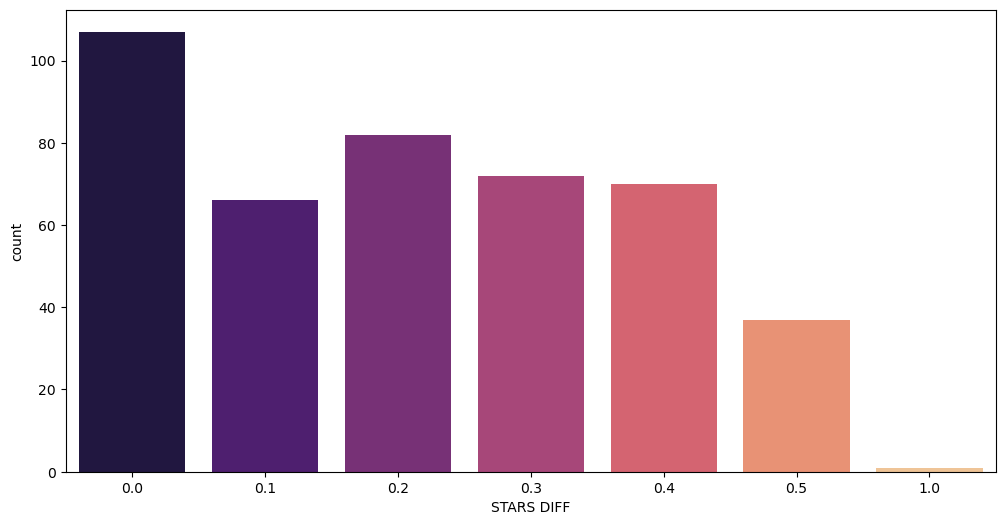

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(data=fnd_voted, x='STARS DIFF', palette='magma')

In [22]:
fnd_voted[fnd_voted['STARS DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## The movie Turbo Kid was displaying a star difference of 1.

In [27]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [28]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


all_sites_scores.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

|Column|Definition|
|:--------:|:--------:|
|FILM|	The film in question|
|RottenTomatoes |	The Rotten Tomatoes Tomatometer score for the film
|RottenTomatoes_User |	The Rotten Tomatoes user score for the film
|Metacritic	| The Metacritic critic score for the film
|Metacritic_User |	The Metacritic user score for the film
|IMDB | The IMDb user score for the film
|Metacritic_user_vote_count |	The number of user votes the film had on Metacritic
|IMDB_user_vote_count |	The number of user votes the film had on IMDb

In [29]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

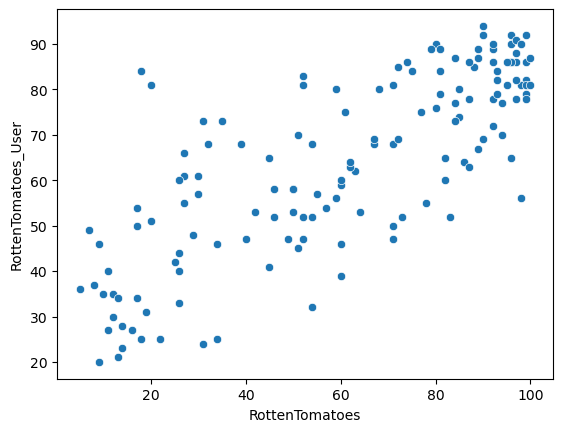

In [30]:
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')

## Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User

In [31]:
all_sites['RottenTomatoes_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

We can calculate the mean absolute difference and mean difference for Rotten Tomatoes rating.

In [32]:
all_sites['RottenTomatoes_Diff'].mean()

-3.0273972602739727

In [34]:
np.abs(all_sites['RottenTomatoes_Diff']).sum()/len(all_sites)

15.095890410958905

**Plot the distribution of the differences between RT Critics Score and RT User Score.**

<Axes: xlabel='RottenTomatoes_Diff', ylabel='Count'>

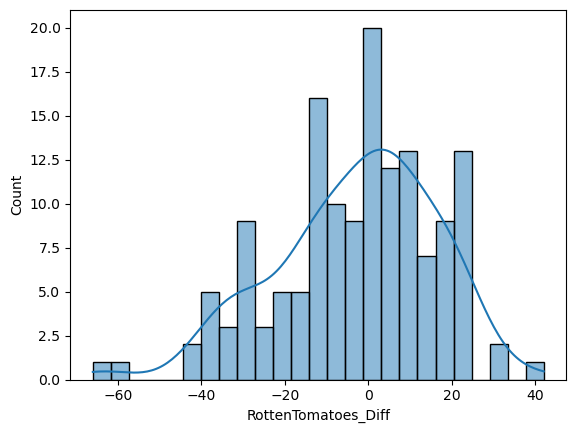

In [35]:
sns.histplot(data=all_sites, x='RottenTomatoes_Diff', bins=25, kde=True)

## As we can see in the above chart, there are a few movies that users really like but critics didn't (-60). On the other hand, the same thing applies (40).

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest negative difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

In [38]:
all_sites.sort_values(by='RottenTomatoes_Diff')[['FILM','RottenTomatoes_Diff']][:5]

,FILM,RottenTomatoes_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [39]:
all_sites.sort_values(by='RottenTomatoes_Diff',ascending=False)[['FILM','RottenTomatoes_Diff']][:5]

,FILM,RottenTomatoes_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## -- METACRITIC & IMDB

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

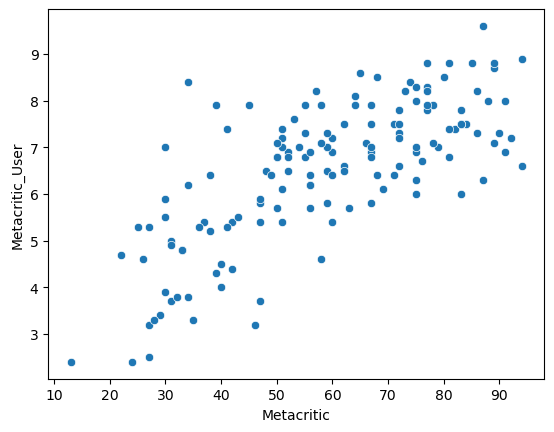

In [40]:
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')


Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

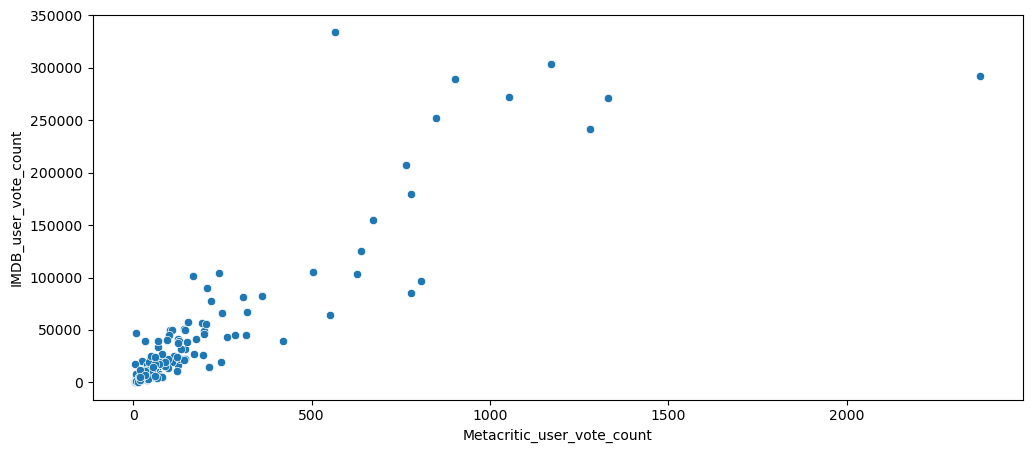

In [41]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

**There are two outliers in the data. We will explore them next.**

In [48]:
all_sites[all_sites['IMDB_user_vote_count']==all_sites['IMDB_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [49]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

In [53]:
df = pd.merge(fnd, all_sites, how='inner', on='FILM')

In [54]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenTomatoes_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RottenTomatoes_Diff         145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [57]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
RottenTomatoes_Diff               42.0
Name: max, dtype: float64

**Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to normalize these values so they all fall between 0-5 stars and the relationship between reviews stays the same.**

In [58]:
df['RT_Norm'] = np.round(df['RottenTomatoes'] / 20, 1)
df['RT_User_Norm'] = np.round(df['RottenTomatoes_User'] / 20, 1)
df['Meta_Norm'] = np.round(df['Metacritic'] / 20, 1)
df['Meta_User_Norm'] = np.round(df['Metacritic_User'] / 2, 1)
df['IMDB_Norm'] = np.round(df['IMDB'] / 2, 1)

In [61]:
norm_scores_df = df[['FILM','STARS', 'RATING', 'RT_Norm', 'RT_User_Norm', 'Meta_Norm', 'Meta_User_Norm', 'IMDB_Norm']]

In [62]:
norm_scores_df.head()

,FILM,STARS,RATING,RT_Norm,RT_User_Norm,Meta_Norm,Meta_User_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [73]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)


C:\Users\arjun\AppData\Local\Temp\ipykernel_7788\3373283706.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


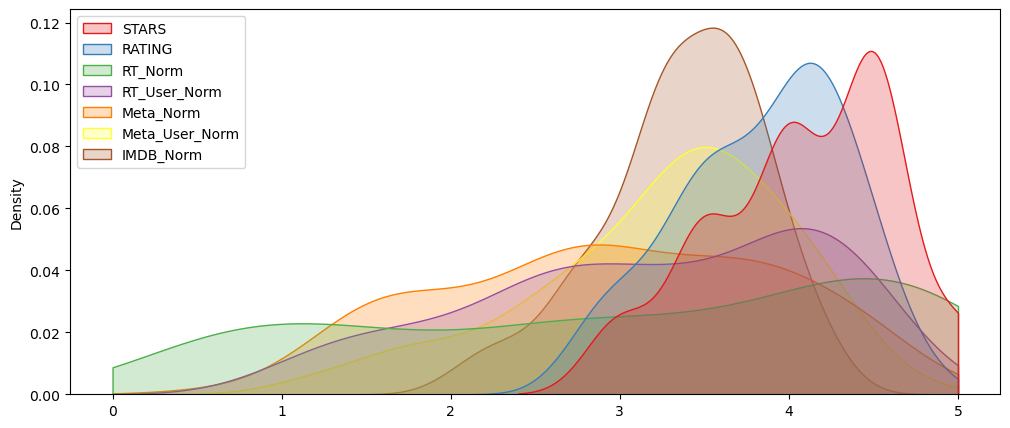

In [74]:
fig, ax = plt.subplots(figsize=(12,5))
sns.kdeplot(data=norm_scores_df, fill=True, clip=(0, 5), palette='Set1')
    
move_legend(ax, "upper left")


Clearly Fandango has an uneven distribution. We can also see that RT critics  (**RT_Norm**) have the most uniform distribution. Let's directly compare these two.

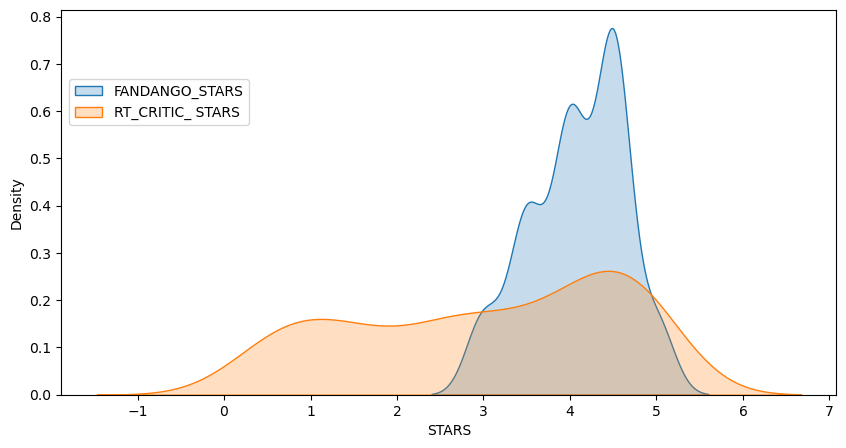

In [76]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=norm_scores_df, x='STARS', fill=True, label='FANDANGO_STARS')
sns.kdeplot(data=norm_scores_df, x='RT_Norm', fill=True, label='RT_CRITIC_ STARS');
plt.legend(loc=(0.01, 0.7))

<Axes: ylabel='Count'>

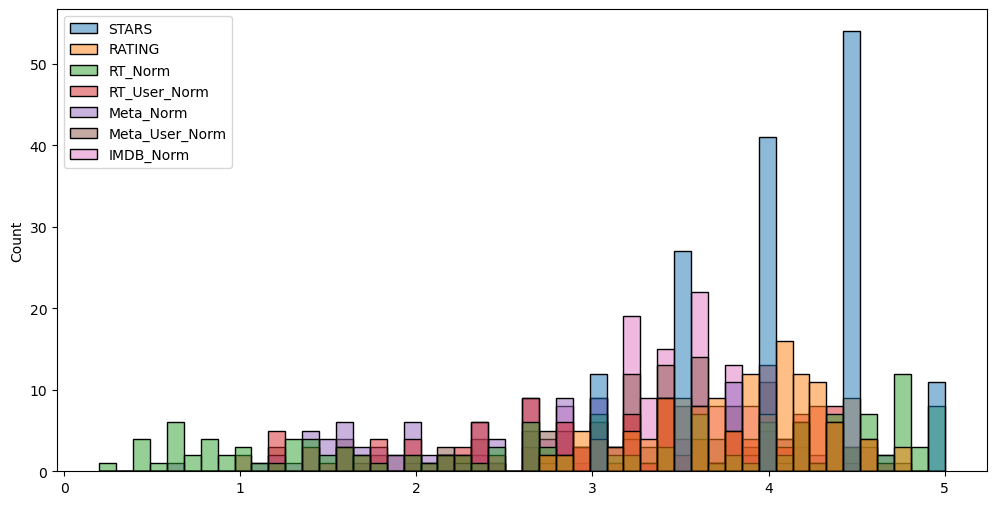

In [79]:
plt.figure(figsize=(12,6))
sns.histplot(data=norm_scores_df, bins=50)

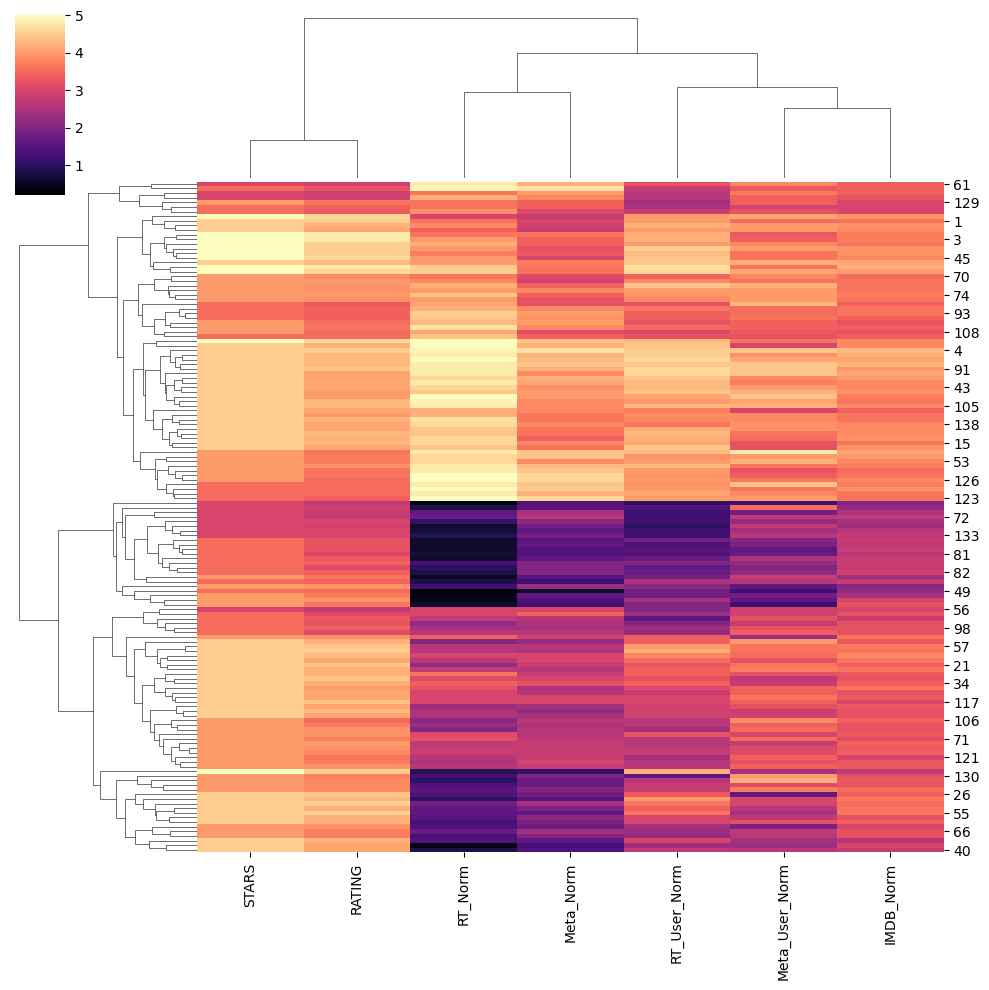

In [82]:
sns.clustermap(data=norm_scores_df.drop('FILM',axis=1), cmap='magma', col_cluster=True)

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating.**

In [84]:
worst_films = norm_scores_df.nsmallest(10, 'RT_Norm')


In [85]:
worst_films

,FILM,STARS,RATING,RT_Norm,RT_User_Norm,Meta_Norm,Meta_User_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


**These are the top 10 worst rated movies according to Rotten tomatoes and all services except Fandango has rated them less than 3**

C:\Users\arjun\AppData\Local\Temp\ipykernel_7788\3373283706.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


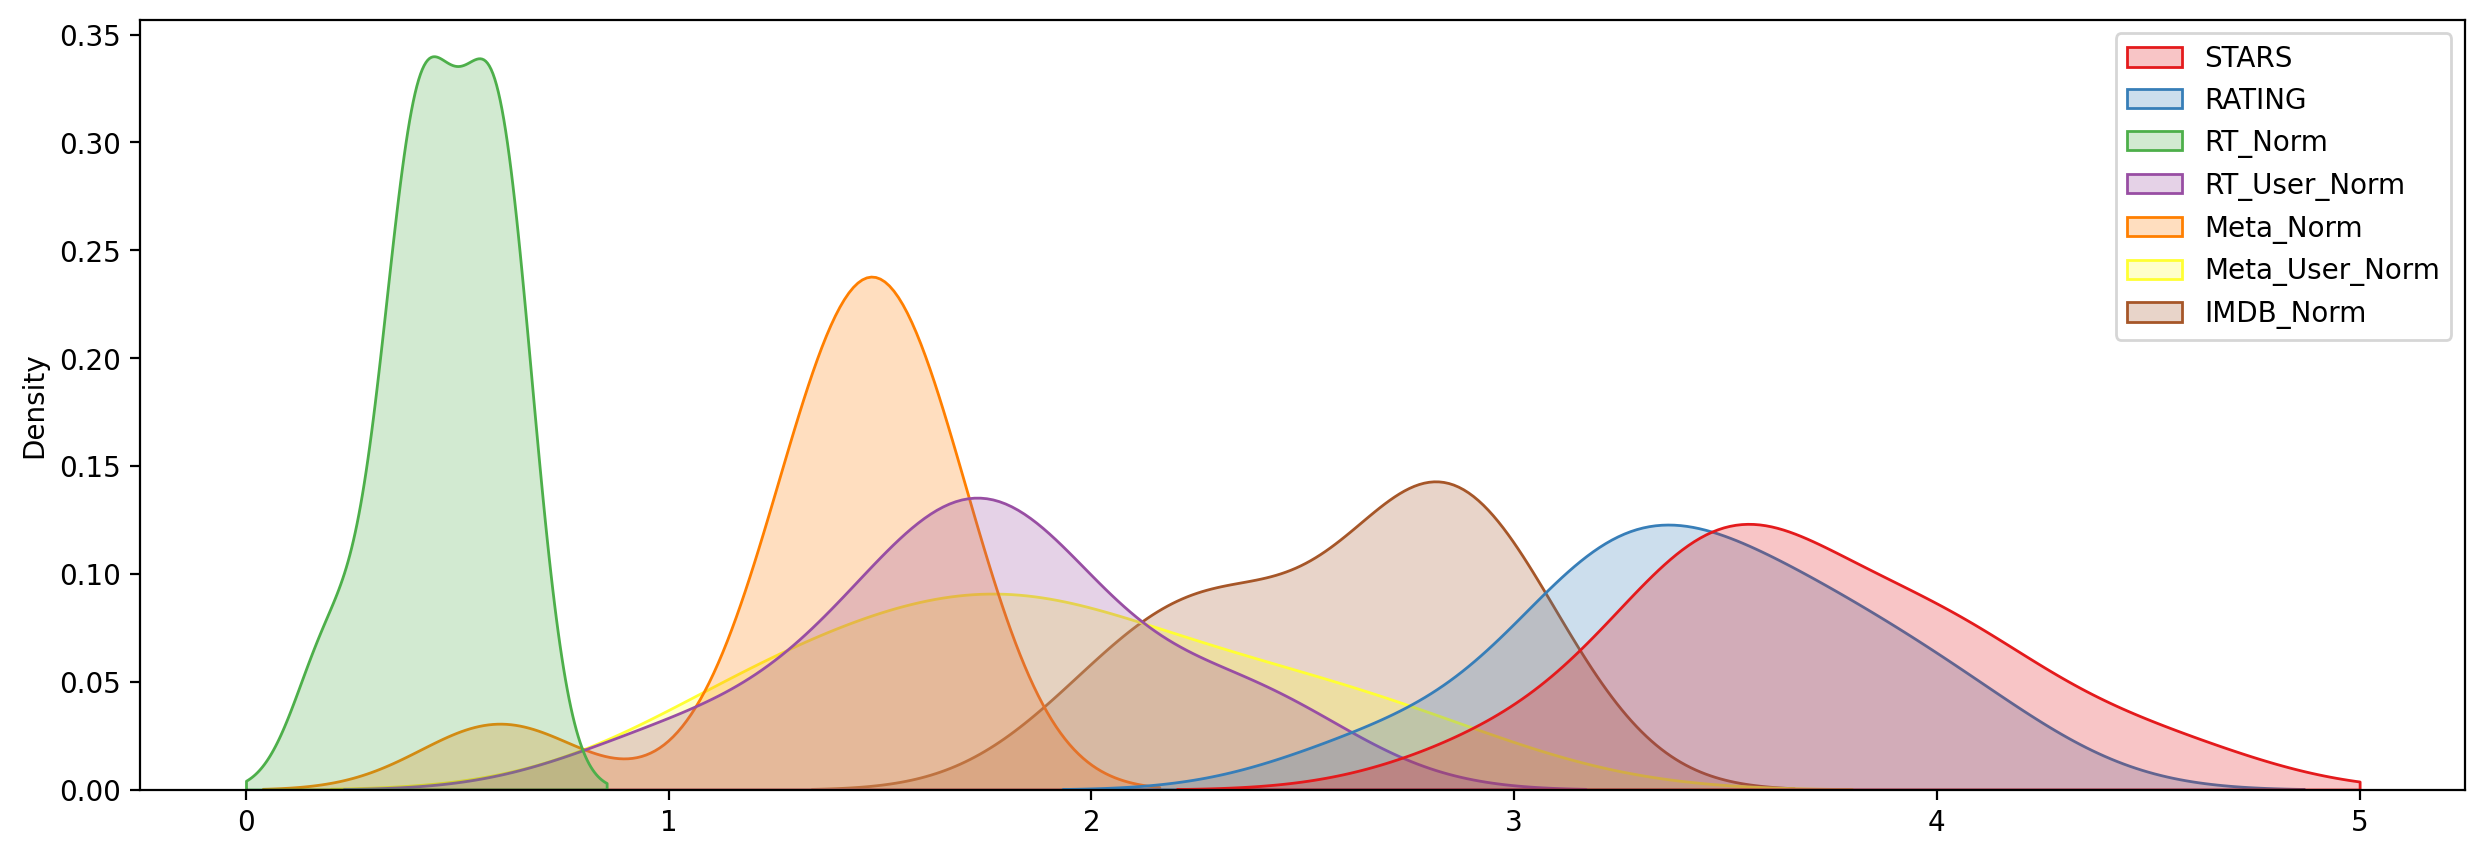

In [87]:
fig, ax = plt.subplots(figsize=(15,5), dpi=200)
sns.kdeplot(data=worst_films, fill=True, clip=(0, 5), palette='Set1')
move_legend(ax, "upper right")


In [89]:
print(f"rating_taken_3 = {(0.4+2.3+1.3+2.3+3)/5}")


rating_taken_3 = 1.86


## Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, Taken 3!. Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!